# TASK 6.6 SOURCING AND ANALYZING TIME SERIES DATA

**THIS NOTEBOOK CONTAINS THE FOLLOWING SCRIPT:**

    1. Install the Quandl library and register for a Quandl account as described in the Exercise.
        
    2. Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the 
    broader research topic for your Achievement project. The best data set would be one that shares a common key with
    your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, 
    so it’s not a requirement.
    
    3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to
    (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure 
    your set doesn’t include any forecasted data. In a markdown cell below the subset (if you make one), explain what logic 
    you were following when selecting your data points. Remember that if you subset your data, you’ll need to reset the
    index, subset, then reset the “Date” column as your index in the new dataframe.
    
    4. Create a line chart of your data.
    
    5. Decompose the data’s components. Analyze the results from the plot in a markdown cell.
    
    6. Conduct a Dickey-Fuller test to check for stationarity.  Interpret the results in a markdown cell and reference 
    your null hypothesis.
    
    7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
        
    8. Check your data’s autocorrelations.

**1. Install the Quandl library and register for a Quandl account as described in the Exercise.**

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm #statistical model library 
# statistical models.
import os
import warnings #this is the warning library

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') #this is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

**2. Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the 
broader research topic for your Achievement project. The best data set would be one that shares a common key with
your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, 
so it’s not a requirement.**

In [2]:
#we open the file specified by the api_key_file path using open()
#read the content of the file using file.read()
#remove any leading or trailing whitespaces using .strip()
#assign the API key value to the api_key variable and configure it in the quandl.ApiConfig object.
api_key_file = r'C:\Users\ddgal\OneDrive\Desktop\Career Foundry Tasks\Data Immersion\Achievement 6\API_code.txt'
with open(api_key_file, 'r') as file:
    api_key = file.read().strip()
    quandl.ApiConfig.api_key = api_key

In [3]:
# import the S&P 500 dividend yield by month
df = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH')

In [4]:
#check shape
df.shape

(1861, 1)

In [5]:
#display all rows
pd.set_option('display.max_rows', None)

In [6]:
#check df
df

,Value
Date,
1871-01-31,5.86
1871-02-28,5.78
1871-03-31,5.64
1871-04-30,5.49
1871-05-31,5.35
1871-06-30,5.39
1871-07-31,5.50
1871-08-31,5.43
1871-09-30,5.37


**3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to
(if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure 
your set doesn’t include any forecasted data. In a markdown cell below the subset (if you make one), explain what logic 
you were following when selecting your data points. Remember that if you subset your data, you’ll need to reset the
index, subset, then reset the “Date” column as your index in the new dataframe.**

In [7]:
#check if there are any null values
df.isnull().sum()

Value    0
dtype: int64

There are no blanks in this data set

In [8]:
#reset index so that date is used when assessing for duplicates or it will show every value which repeats itself as a duplicate
df_2 = df.reset_index()

In [9]:
#check df_2
df_2.head()

,Date,Value
0,1871-01-31,5.86
1,1871-02-28,5.78
2,1871-03-31,5.64
3,1871-04-30,5.49
4,1871-05-31,5.35


In [10]:
df_2_dups = df_2.duplicated()
df_2_dups.sum(0)

0

There are no duplicates in this df.

In [11]:
#create a subset showing the last 50 years
df_sub = df_2.loc[(df_2['Date'] >= '1973-05-31') & (df_2['Date'] <= '2023-06-01')]

In [12]:
#check df_sub
df_sub.shape

(632, 2)

In [13]:
#print df_sub
df_sub

,Date,Value
1228,1973-05-31,2.99
1229,1973-06-30,3.07
1230,1973-07-31,3.06
1231,1973-08-31,3.13
1232,1973-09-30,3.10
1233,1973-10-31,3.01
1234,1973-11-30,3.28
1235,1973-12-31,3.57
1236,1974-01-31,3.54
1237,1974-02-28,3.66


I created a subset of the data showing the values of the S&P 500 dividend yield by month for the last 50 years.  I chose the last 50 years because I think showing anything before that is highly irrelevant to our analysis.  In addition, the events of the great depression and World War 1 and 2 will skew the data, so I removed them.

In [14]:
# Set the "Date" column as the index
from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Date']) #create a datetime column from 'Date'
df_sub = df_sub.set_index('datetime') #set the datetime as the index of the dataframe.
df_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,Value
datetime,
1973-05-31,2.99
1973-06-30,3.07
1973-07-31,3.06
1973-08-31,3.13
1973-09-30,3.10


**4. Create a line chart of your data.**

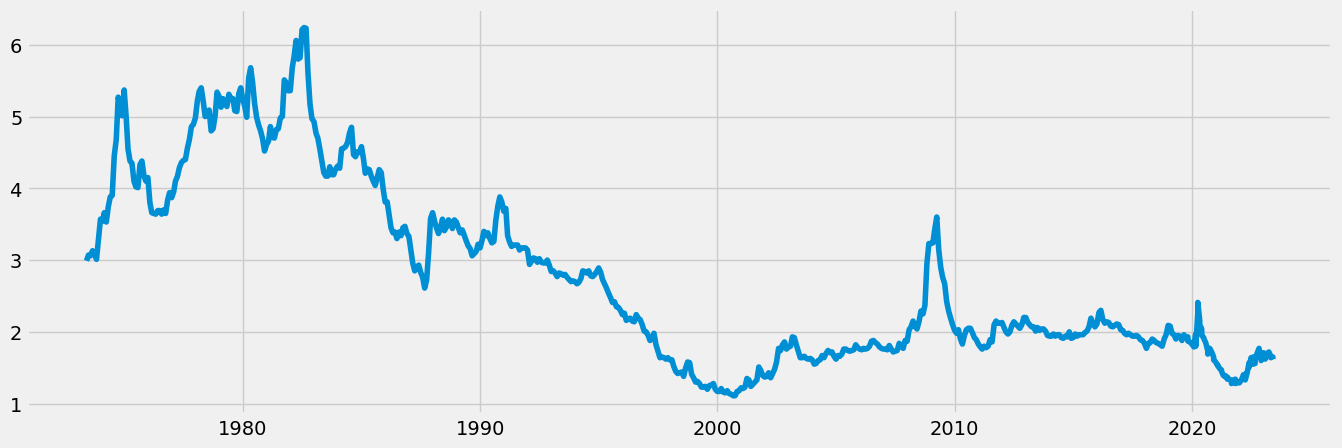

In [15]:
#plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

**5. Decompose the data’s components. Analyze the results from the plot in a markdown cell.**

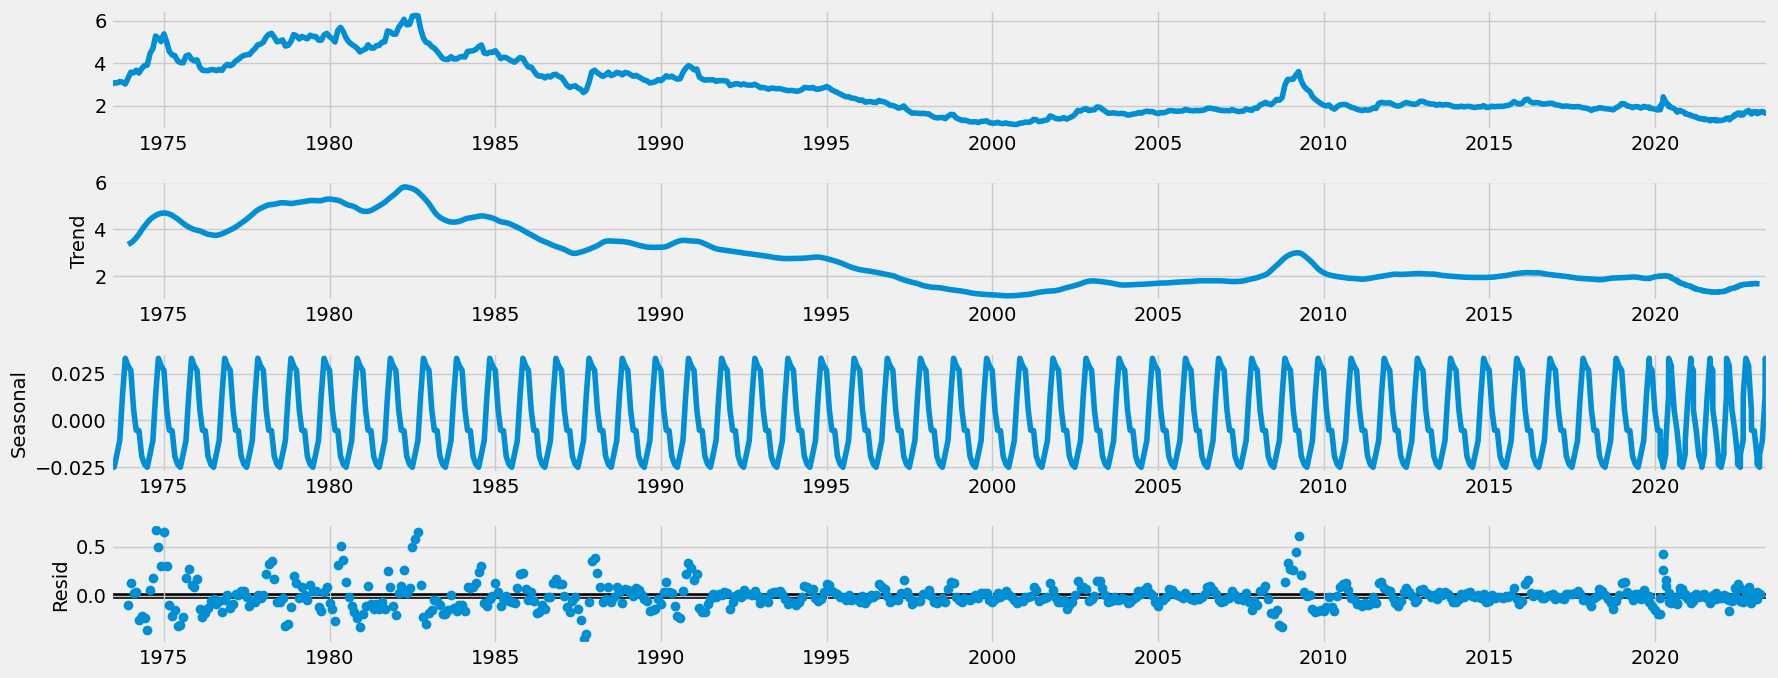

In [16]:
#decompose the time series using an additive model since the data appears linear
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive', period=12) #period = 12 to signify the dfs values are monthly

#fixed size  of 18, 7 for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7
# Plot the separate components

#display all the charts
decomposition.plot()
plt.show()

So, we obviously have a non-stationary unsmoothed data set here with seasonality and a lot of random noise; it is unsmoothed since the trend line differs from the original data set which is the top chart. 

**6. Conduct a Dickey-Fuller test to check for stationarity.  Interpret the results in a markdown cell and reference 
your null hypothesis.**

In [17]:
#the adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller #import the adfuller() function

def dickey_fuller(timeseries): #define the function
    #perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

#apply the test using the function on the time series
dickey_fuller(df_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.393905
p-value                          0.585195
Number of Lags Used             12.000000
Number of Observations Used    619.000000
Critical Value (1%)             -3.440958
Critical Value (5%)             -2.866221
Critical Value (10%)            -2.569263
dtype: float64


Here, the Test Statistic is greater than critical value at 5% and 10% which means we cannot reject the null hypothesis and thus have to accept it.  This means there is a unit root in the data and it is non-stationary.  

**7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.**

In [18]:
#the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
df_st = df_sub - df_sub.shift(1) 

In [19]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.
df_st.dropna(inplace = True) 

In [20]:
#check df_st
df_st.head()

,Value
datetime,
1973-06-30,0.08
1973-07-31,-0.01
1973-08-31,0.07
1973-09-30,-0.03
1973-10-31,-0.09


In [21]:
#run dickey fuller test
dickey_fuller(df_st)

Dickey-Fuller Stationarity test:
Test Statistic                -7.512337e+00
p-value                        3.985128e-11
Number of Lags Used            1.100000e+01
Number of Observations Used    6.190000e+02
Critical Value (1%)           -3.440958e+00
Critical Value (5%)           -2.866221e+00
Critical Value (10%)          -2.569263e+00
dtype: float64


Here, the test Statistic is less than the critical value at 5% and 10%, we also have a p-value<0.05 which means we can reject the null hypothesis. This means there is no unit root in the data and it is now stationary. 

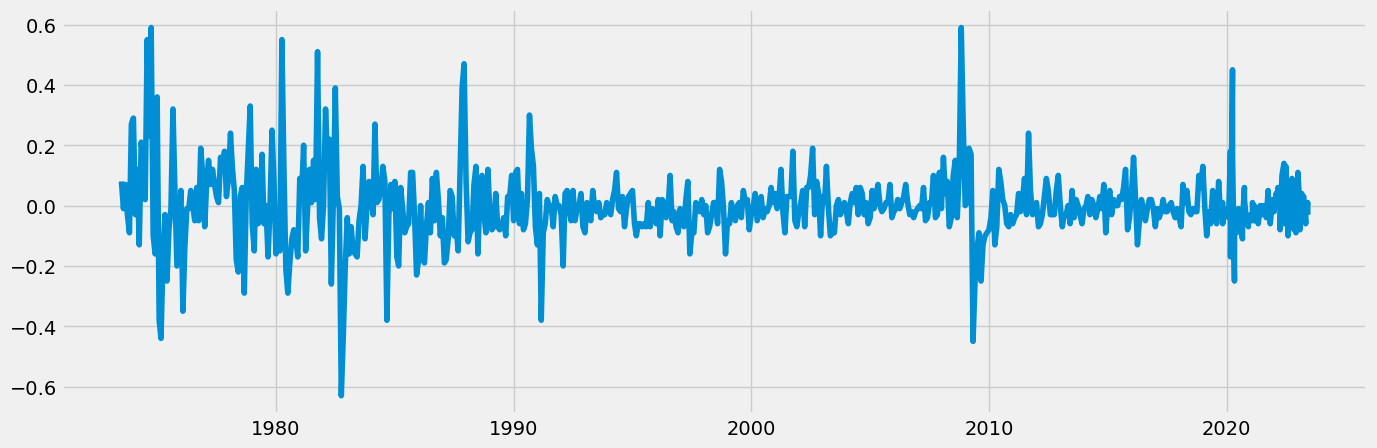

In [22]:
#plot the stationary data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_st)

The data set looks stationary now, with very little changes in the values and no underlying trends.

**8. Check your data’s autocorrelations.**

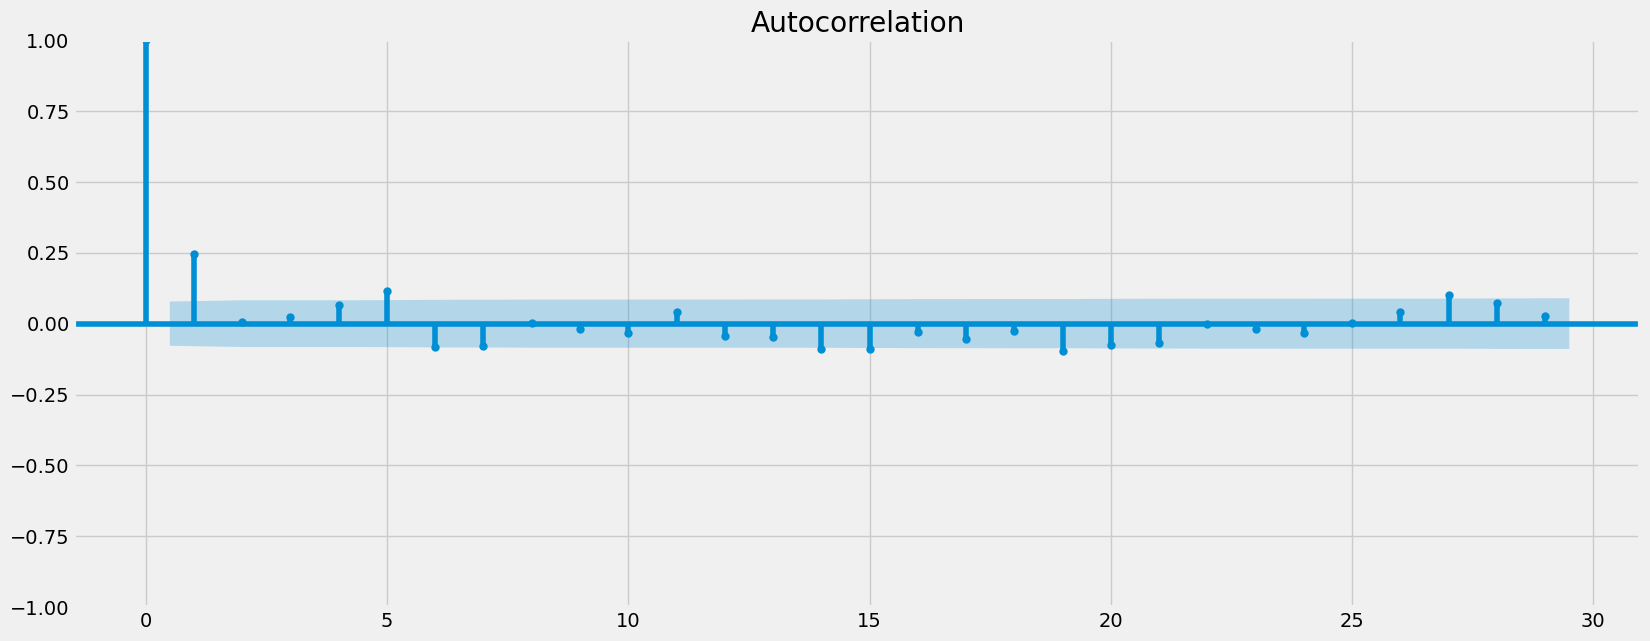

In [23]:
#import plot_acf function from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

#show the autocorrelations for df_st
plot_acf(df_st)
plt.show()

I count 9 vertical lines above the confidence level, which is less than 10, so a second round of differencing is unnecessary.  

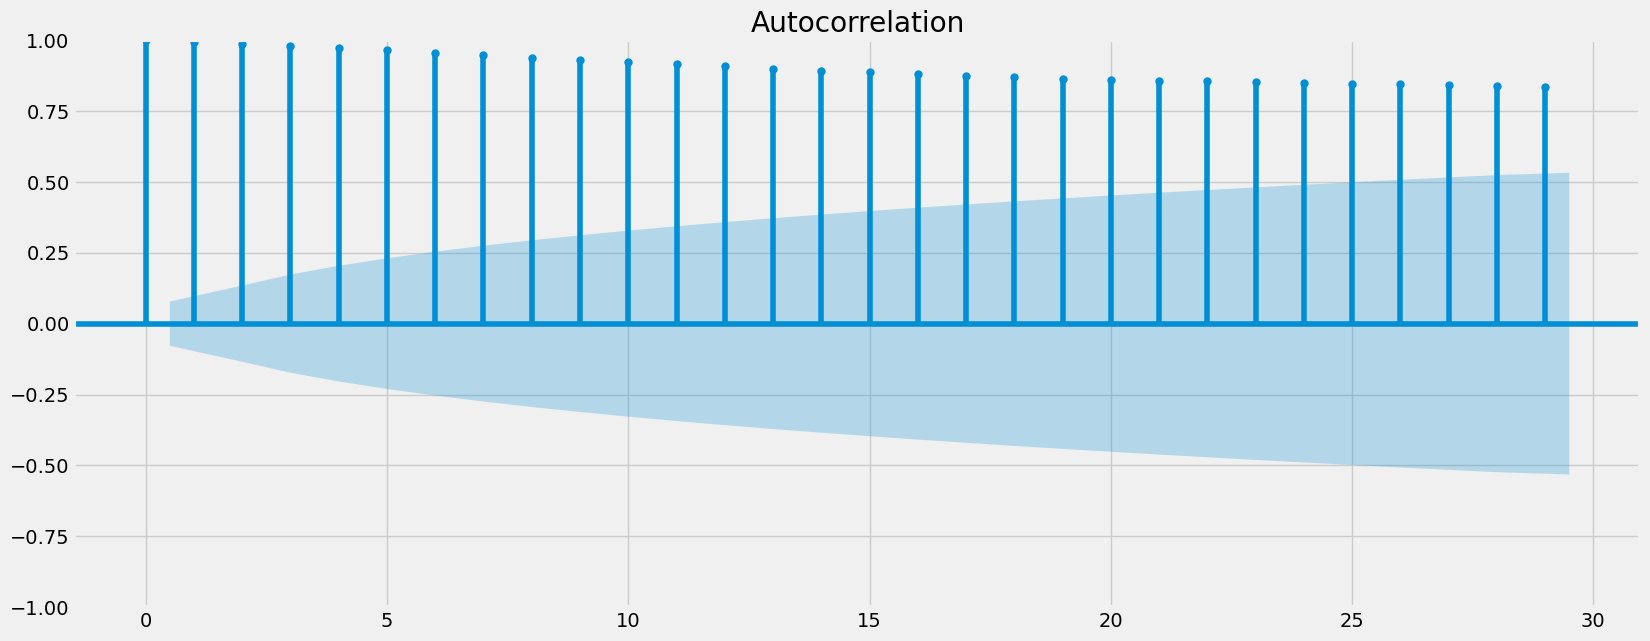

In [24]:
#show the autocorrelations for df_sub
plot_acf(df_sub)
plt.show()

There is a huge difference in the autocorrelations between df_sub and df_st; df_sub has all the lines over the confidence level while df_st (which is the stationary version of df_sub) has only 9 of the thirty lines over the confidence level.  Big difference here between non-stationary and stationary autocorrelation levels.  